### Background and Context:

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

 

### Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

 

### Dataset:

The dataset has the following columns:

tweet_id                                                           
airline_sentiment                                               
airline_sentiment_confidence                               
negativereason                                                   
negativereason_confidence                                    
airline                                                                    
airline_sentiment_gold                                              
name     
negativereason_gold 
retweet_count
text
tweet_coord
tweet_created
tweet_location 
user_timezone

In [4]:
 !pip install contractions

     |████████████████████████████████| 321 kB 5.2 MB/s 
     |████████████████████████████████| 284 kB 40.9 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85442 sha256=7304031c9c95d06865ebc6c70c2053c0c2535aa7dc1fa380b72f7e5741eedb15
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt       

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


### Read the data

In [7]:
project_path = '/content/drive/My Drive/NLP_AIML/'
data = pd.read_csv(project_path + "Tweets.csv")

In [8]:
data.sample(n=4)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
12891,569989330057342977,neutral,1.0000,NaN,NaN,American,NaN,hellodukesy,NaN,0,@AmericanAir originating at SFO and going to LAX.,NaN,2015-02-23 14:37:00 -0800,San Francisco,Pacific Time (US & Canada)
1501,569696881330167808,negative,1.0000,Late Flight,0.6534,United,NaN,bricon67,NaN,0,@United landed in den on time stuck waiting fo...,NaN,2015-02-22 19:14:55 -0800,"ÜT: 33.987103,-118.399024",NaN
13560,569831393682976768,neutral,0.6872,NaN,0.0000,American,NaN,hale36,NaN,0,@AmericanAir hi do you have a phone number to ...,NaN,2015-02-23 04:09:25 -0800,NaN,NaN
6691,567732510692347904,negative,1.0000,Customer Service Issue,1.0000,Southwest,NaN,iBrianWeaver,NaN,0,@SouthwestAir I've been on hold for an hour &a...,NaN,2015-02-17 09:09:13 -0800,"Nashville, TN",Central Time (US & Canada)


In [9]:
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns in the dataset')

There are 14640 rows and 15 columns in the dataset


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

* There are a lot of missing values in the dataset

In [11]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
tweet_id,14640,NaN,NaN,NaN,5.69218e+17,7.79111e+14,5.67588e+17,5.68559e+17,5.69478e+17,5.6989e+17,5.70311e+17
airline_sentiment,14640,3,negative,9178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline_sentiment_confidence,14640,NaN,NaN,NaN,0.900169,0.16283,0.335,0.6923,1,1,1
negativereason,9178,10,Customer Service Issue,2910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negativereason_confidence,10522,NaN,NaN,NaN,0.638298,0.33044,0,0.3606,0.6706,1,1
airline,14640,6,United,3822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline_sentiment_gold,40,3,negative,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,14640,7701,JetBlueNews,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negativereason_gold,32,13,Customer Service Issue,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,14640,NaN,NaN,NaN,0.0826503,0.745778,0,0,0,0,44


In [12]:
data['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

* There are 6 airlines in the data

### EDA

In [13]:
import seaborn as sns

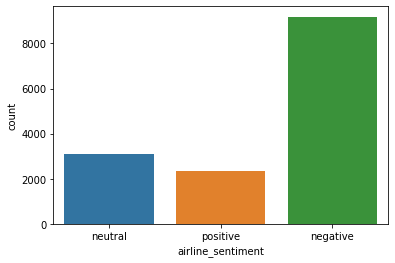

In [14]:
sns.countplot(x='airline_sentiment', data=data)

* Above plot is for the distribution of sentiments across all tweets. The count of negative sentiment tweets is much higher than count of neutral and positive sentiment

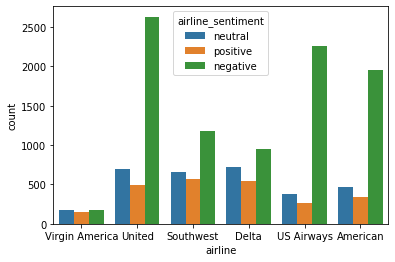

In [15]:
sns.countplot(x='airline', hue='airline_sentiment', data=data)

* Above plot is for the distribution of sentiment of tweets for each airline. Except for Virgin America, the distribution is similar across all airlines which is negative sentiments are higher than positive and neutral sentiments. For Virgin America, all the 3 sentiments counts is nearly equal

[Text(0, 0, 'Bad Flight'),
 Text(0, 0, "Can't Tell"),
 Text(0, 0, 'Late Flight'),
 Text(0, 0, 'Customer Service Issue'),
 Text(0, 0, 'Flight Booking Problems'),
 Text(0, 0, 'Lost Luggage'),
 Text(0, 0, 'Flight Attendant Complaints'),
 Text(0, 0, 'Cancelled Flight'),
 Text(0, 0, 'Damaged Luggage'),
 Text(0, 0, 'longlines')]

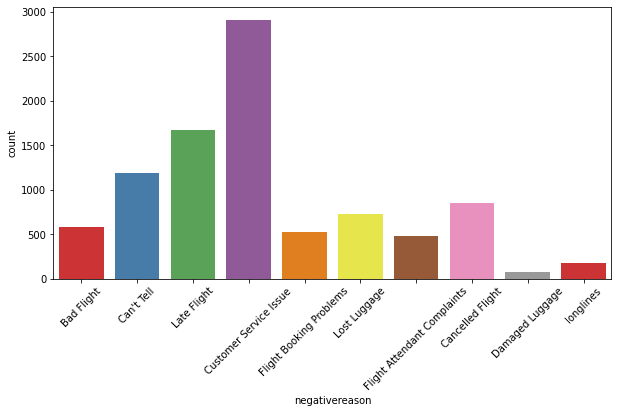

In [16]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=data,
    x='negativereason',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

* Above plot is for the distribution of all the negative reasons. Customer service issue has the highest count and Damaged luggage has the lowest count

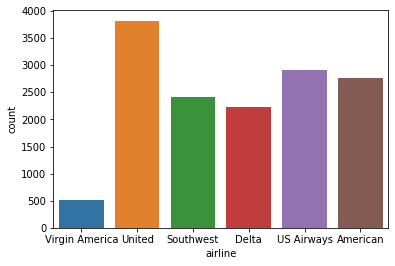

In [17]:
sns.countplot(x='airline', data = data)

* Above plot is for the distribution of number of tweets across all the airlines. United airlines has the highest number of tweets and Virgin america has the lowest number of tweets

#### Word cloud graphs

##### Positive sentiment

In [18]:
import wordcloud
def show_wordcloud(Positive_sent, title):
    text = ' '.join(Positive_sent['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

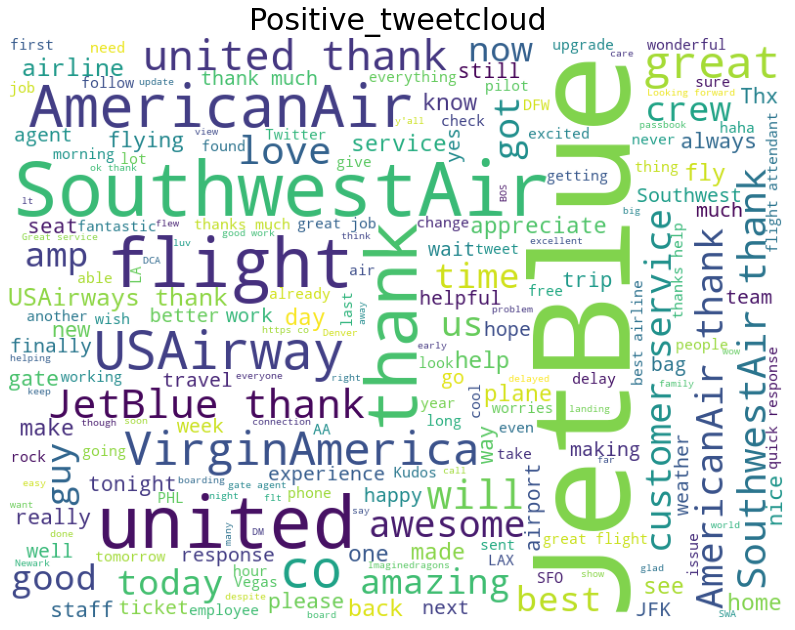

In [19]:
Positive_sent = data[data['airline_sentiment']=='positive']
show_wordcloud(Positive_sent, "Positive_tweetcloud")

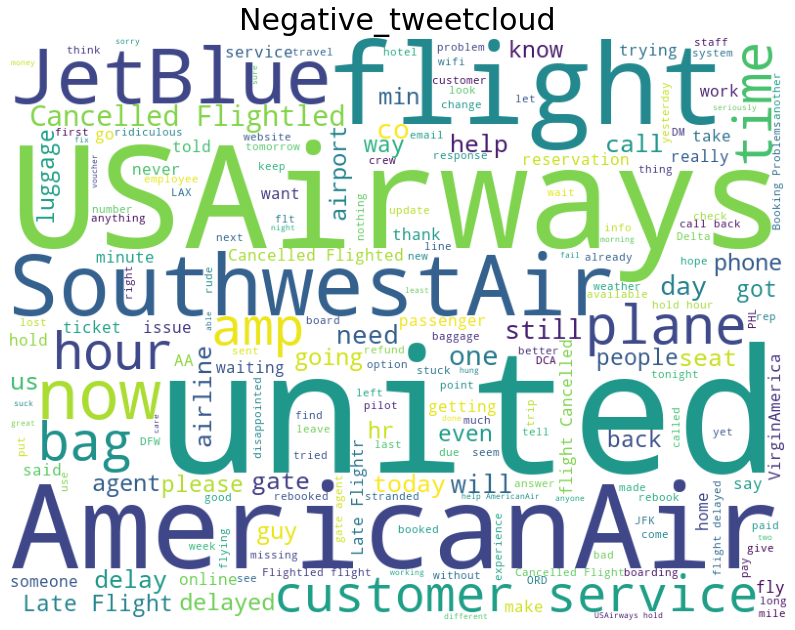

In [20]:
Negative_sent = data[data['airline_sentiment']=='negative']
show_wordcloud(Negative_sent, "Negative_tweetcloud")

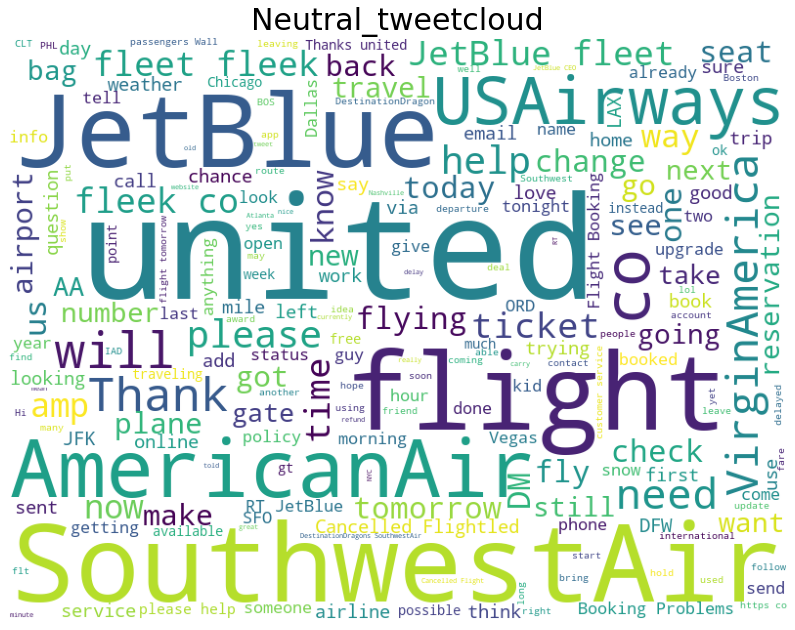

In [21]:
Neutral_sent = data[data['airline_sentiment']=='neutral']
show_wordcloud(Neutral_sent, "Neutral_tweetcloud")

#### Dropping all the columns except tweet text and airline sentiment

In [22]:
data_sel = data[['text', 'airline_sentiment']]

In [23]:
print(f'There are {data_sel.shape[0]} rows and {data_sel.shape[1]} columns after dropping fields')

There are 14640 rows and 2 columns after dropping fields


In [24]:
data_sel.isna().sum()

text                 0
airline_sentiment    0
dtype: int64

* There are no missing values in this set

In [25]:
pd.set_option('display.max_colwidth', None)
data_sel.head(5)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


### Text preprocessing

- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove numbers.
- Tokenization
- To remove Stopwords.
- Lemmatized data

We have used the **NLTK library to tokenize words, remove stopwords and lemmatize the remaining words**

In [26]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

data_sel['text'] = data_sel['text'].apply(lambda x: strip_html(x))

data_sel.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [27]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data_sel['text'] = data_sel['text'].apply(lambda x: replace_contractions(x))

data_sel.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


In [28]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data_sel['text'] = data_sel['text'].apply(lambda x: remove_numbers(x))

data_sel.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


In [29]:
data_sel['text'] = data_sel.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
data_sel.head()

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",positive
2,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]",neutral
3,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]",negative
4,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",negative


In [31]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist)) 

In [32]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data_sel['text'] = data_sel.apply(lambda row: normalize(row['text']), axis=1)

data_sel.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,text,airline_sentiment
0,virginamerica dhepburn say,neutral
1,virginamerica plus add commercials experience tacky,positive
2,virginamerica not today must mean need take another trip,neutral
3,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,negative
4,virginamerica really big bad thing,negative


### **Building the model based on CountVectorizer and Random Forest**

In [33]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features=2000)                # Keep only 2000 features as number of features will increase the processing time.
data_features = bow_vec.fit_transform(data_sel['text'])

data_features = data_features.toarray()      

In [34]:
data_features.shape

(14640, 2000)

In [36]:
labels = data_sel['airline_sentiment']

In [37]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [56]:
# Using Random Forest to build model for the classification of tweets.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=3, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)


In [57]:
forest.score(X_test, y_test)

0.7206284153005464

#### Improve the model using RandomSearchCV

In [53]:
from sklearn.model_selection import RandomizedSearchCV

# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1, n_jobs=4)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [5, 10,15],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,'log2','auto', 0.3],
        "max_samples": [0.7,0.9,None],
        "max_depth": [3,5,7,9]
}


# Run the grid search
grid_obj = RandomizedSearchCV(rf_estimator, parameters, scoring='f1_micro',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features=0.3,
                       max_leaf_nodes=None, max_samples=0.9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [54]:
rf_tuned.score(X_test, y_test)

0.7165300546448088

* Test score has not improved after doing random search

[[2396  311  107]
 [ 382  404   98]
 [ 227  102  365]]
0.7206284153005464


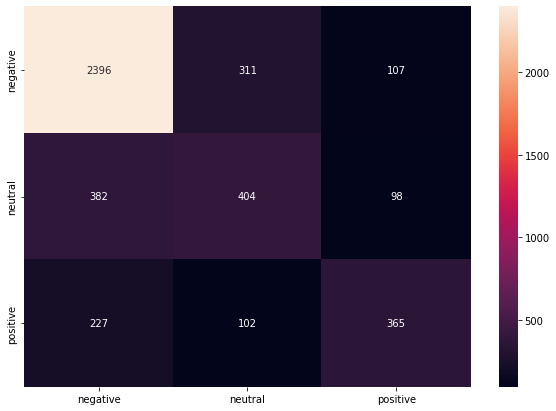

In [66]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
result = forest.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative', 'neutral', 'positive']],
                  columns = [i for i in ['negative', 'neutral', 'positive']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

### **Word Cloud of top 40 important features from the CountVectorizer + Random Forest based model**

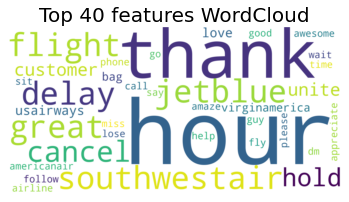

In [67]:
all_features = bow_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=forest.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

### **Term Frequency(TF) - Inverse Document Frequency(IDF)**

In [68]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()

data_features.shape

(14640, 2000)

In [69]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [75]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=3, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)


In [76]:
forest.score(X_test, y_test)

0.7056010928961749

#### Improve the model using RandomSearchCV

In [77]:
from sklearn.model_selection import RandomizedSearchCV

# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1, n_jobs=4)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [5, 10,15],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,'log2','auto', 0.3],
        "max_samples": [0.7,0.9,None],
        "max_depth": [3,5,7,9]
}


# Run the grid search
grid_obj = RandomizedSearchCV(rf_estimator, parameters, scoring='f1_micro',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features=0.7,
                       max_leaf_nodes=None, max_samples=0.9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=4,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [78]:
rf_tuned.score(X_test, y_test)

0.7153916211293261

* Test score has slightly improved after doing random search

[[2610  138   66]
 [ 596  245   43]
 [ 277  130  287]]
0.7153916211293262


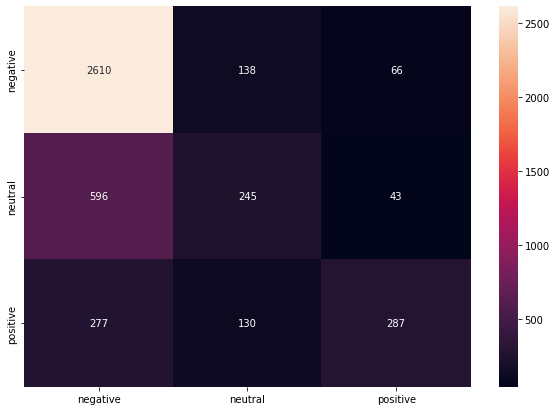

In [79]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
result = rf_tuned.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative', 'neutral', 'positive']],
                  columns = [i for i in ['negative', 'neutral', 'positive']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

### **Word Cloud of top 40 important features from the CountVectorizer + Random Forest based model**

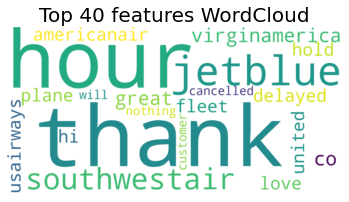

In [80]:
all_features = vectorizer.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=rf_tuned.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

### **Summary**:

- The goal was to **build a model for text-classification**.
- We **pre-processed the data** using various techniques and libraries.
- We **created a Word Cloud plot** based on summary and high and low score.
- The **pre-processed data is converted to numbers (vectorized)**, so that we can feed the data into the model.
- We trained the model and optimized the parameter, which **led to an increase the overall accuracy.**
- After building the classification model, we **predicted the results for the test data.**
- We saw that using the above techniques, our model performed well in perspective of how text classification models perform.
- We can also increase the **max_feature parameter** in the vectorizer. 
- We can apply **other model tuning and hyperparameter tuning techniques, as well as other pre-processing techniques** to increase the overall accuracy even further.
- The model using TF_IDF vectorizer is not really better than the model using CountVectorizer